In [2]:
import numpy as np
import cv2
import json
import glob
import sys
import os
import matplotlib.pyplot as plt
from scipy import ndimage
from scipy.optimize import fmin_powell
import skimage
from scipy import stats as st
from PIL import Image
from operator import attrgetter
sys.path.append("/home/eccoope/pvimage_snl")

from pyhull import qconvex

Should be done after the image has been cropped and straightened

Text(0.5, 0.98, 'EL_2x2_NQ-04_20230915_130134.jpg')

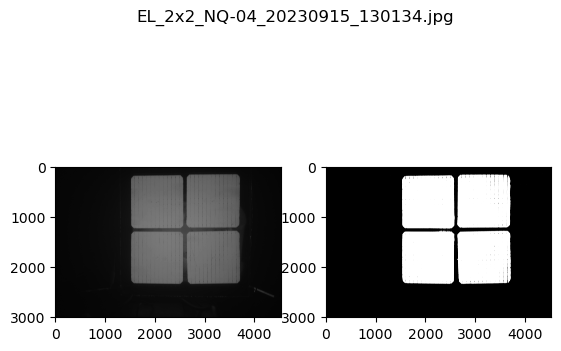

In [15]:
sys.path.append("/home/eccoope/pv-vision/")
from pv_vision.transform_crop.solarmodule import SplitModule

imgdir = '/projects/wg-psel-ml/EL_images/eccoope/raw_images'
imglist = os.listdir(imgdir)

j = -4

ImgPath = os.path.join(imgdir, imglist[j])

img = cv2.imread(ImgPath)
my_img = np.float32(img)
gray = skimage.color.rgb2gray(my_img)

# upper_val = skimage.filters.threshold_otsu(gray, 255)
# sometimes you need to manually set the upper value
upper_val = 75

th3 = gray > upper_val
label_image = skimage.measure.label(th3) # connected component analysis

fig, ax = plt.subplots(ncols=2)
ax[0].imshow(gray, cmap = "gray")
ax[1].imshow(th3, cmap = "gray")
fig.suptitle(imglist[j])

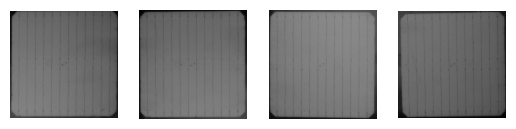

In [16]:
boxes = []
for region in skimage.measure.regionprops(label_image):
    area = region.area
    minRow, minCol, maxRow, maxCol = region.bbox
    boxes.append((area,minRow, minCol, maxRow, maxCol))

boxes2 = []
for i in range(len(boxes)):
    b = boxes[i]
    if b[0] > 40000:
        boxes2.append(b)

tol = 10

fig, ax = plt.subplots(ncols=len(boxes2))

for i in range(len(boxes2)):

    b = boxes2[i]
    x1 = gray[b[1]-tol:b[3]+tol, b[2]-tol:b[4]+tol]

    ax[i].imshow(x1, cmap='gray')
    ax[i].axis('off')

(-0.5, 1071.5, 1083.5, -0.5)

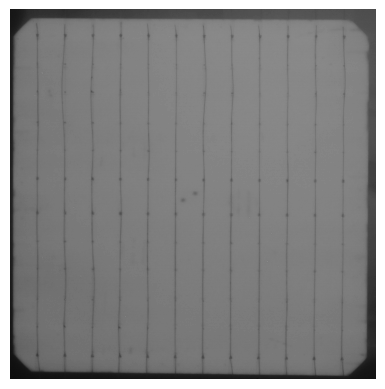

In [19]:
fig, ax = plt.subplots()
i = 2

b = boxes2[i]

x1 = gray[b[1]-tol:b[3]+tol, b[2]-tol: b[4] + tol]

ax.imshow(x1, cmap='gray')
ax.axis('off')

In [381]:
save_path = os.path.join('/home/eccoope/el_img_cracks_ec/asu3_cropped', f'{i}_' + imglist[j])
plt.imsave(save_path, x1, cmap='gray')

In [393]:
for i in range(len(boxes2)):

    b = boxes2[i]
    x1 = gray[b[1]-tol:b[3]+tol, b[2]-tol:b[4]+tol]
    save_path = os.path.join('/home/eccoope/el_img_cracks_ec/asu3_cropped', f'{i}_' + imglist[j])
    plt.imsave(save_path, x1, cmap='gray')